# Dependencies and Setup

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset
from torchvision.transforms.functional import to_grayscale
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import time
# You might not have tqdm, which gives you nice progress bars
!pip install tqdm
from tqdm.notebook import tqdm
import os
import json
import cv2
import copy
import pandas as pd
import PIL
import random
from collections import defaultdict


# For reproducibility
torch.manual_seed(1234)

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only")
    print("You may want to try to use the GPU in Google Colab by clicking in:")
    print("Runtime > Change Runtime type > Hardware accelerator > GPU.")

Using the GPU!


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.4/756.4 kB 8.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_dir = "/content/drive/MyDrive/6.8301_Final_Project"
data_dir = project_dir + "/data"
YOLO_dir = data_dir + '/datasets/YOLO_data'
yaml_path = YOLO_dir + '/data.yaml'
models_dir = data_dir + '/models'
pretrained_models_dir = data_dir + '/pretrained_models'


# Run YOLO Model

In [ ]:
import yaml


with open(yaml_path, "r") as yaml_file:
  data_yaml = yaml_file
  yaml_contents = yaml.safe_load(yaml_file)
  print(yaml_contents)

{'path': '/content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_format', 'train': 'images/train', 'val': 'images/val', 'names': {0: 'None', 1: '\\\\alpha', 2: '\\\\approx', 3: '\\\\beta', 4: '\\\\cdot', 5: '\\\\delta', 6: '\\\\div', 7: '\\\\frac', 8: '\\\\gamma', 9: '\\\\geq', 10: '\\\\infty', 11: '\\\\int', 12: '\\\\left(', 13: '\\\\left[', 14: '\\\\left\\\\{', 15: '\\\\left|', 16: '\\\\leq', 17: '\\\\neq', 18: '\\\\pi', 19: '\\\\pm', 20: '\\\\prime', 21: '\\\\right)', 22: '\\\\right]', 23: '\\\\right|', 24: '\\\\sqrt', 25: '\\\\theta', 26: '+', 27: ',', 28: '-', 29: '.', 30: '/', 31: '0', 32: '1', 33: '2', 34: '3', 35: '4', 36: '5', 37: '6', 38: '7', 39: '8', 40: '9', 41: ';', 42: '<', 43: '=', 44: '>', 45: 'A', 46: 'C', 47: 'F', 48: 'G', 49: 'H', 50: 'L', 51: 'a', 52: 'b', 53: 'c', 54: 'd', 55: 'e', 56: 'f', 57: 'g', 58: 'h', 59: 'k', 60: 'n', 61: 'p', 62: 'r', 63: 's', 64: 't', 65: 'u', 66: 'v', 67: 'w', 68: 'x', 69: 'y', 70: 'z', 71: '\\\\lim_', 72: '\\\\log', 73: '\\\\co

In [ ]:
best_path = YOLO_dir + '/train/weights/last.pt'

In [ ]:
# Load a model
model = YOLO(best_path)  # load a pretrained model (recommended for training)


In [ ]:
# Train the model
results = model.train(data=yaml_path, epochs=50, imgsz=256, patience=10, resume=True, device=device, project=YOLO_dir)


engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/train/weights/last.pt, data=/content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=cuda:0, workers=0, project=/content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/train/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fa

100%|██████████| 755k/755k [00:00<00:00, 16.3MB/s]


TensorBoard: Start with 'tensorboard --logdir /content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/train', view at http://localhost:6006/

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 81.6MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/labels/train.cache... 4093 images, 2307 backgrounds, 0 corrupt: 100%|██████████| 6400/6400 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/labels/val.cache... 251 images, 1349 backgrounds, 0 corrupt: 100%|██████████| 1600/1600 [00:00<?, ?it/s]

Plotting labels to /content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000104, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training /content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/train/weights/last.pt from epoch 20 to 50 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.686G      1.299      2.329      1.424        651        256: 100%|██████████| 400/400 [05:08<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [06:24<00:00,  7.69s/it]


                   all       1600       4865      0.136      0.276      0.067     0.0491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.598G      1.291      2.316      1.413        641        256: 100%|██████████| 400/400 [03:08<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:29<00:00,  1.67it/s]


                   all       1600       4865      0.163       0.27     0.0684     0.0499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      0.64G      1.276       2.29      1.404        443        256: 100%|██████████| 400/400 [03:05<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:29<00:00,  1.72it/s]


                   all       1600       4865      0.147      0.289     0.0725     0.0534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.736G        1.3      2.288       1.42        521        256: 100%|██████████| 400/400 [03:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:29<00:00,  1.72it/s]


                   all       1600       4865      0.151      0.292     0.0723     0.0534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.608G      1.302      2.291      1.422        505        256: 100%|██████████| 400/400 [03:00<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:30<00:00,  1.64it/s]


                   all       1600       4865      0.147        0.3     0.0737     0.0545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.707G      1.292      2.268      1.414        718        256: 100%|██████████| 400/400 [03:02<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


                   all       1600       4865      0.152      0.301     0.0745     0.0552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.696G      1.286       2.25      1.411        417        256: 100%|██████████| 400/400 [03:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:28<00:00,  1.73it/s]


                   all       1600       4865      0.155      0.293     0.0749     0.0561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.763G       1.28      2.246      1.406        596        256: 100%|██████████| 400/400 [03:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:28<00:00,  1.74it/s]


                   all       1600       4865      0.173      0.312     0.0774     0.0575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.617G      1.277      2.233      1.402        568        256: 100%|██████████| 400/400 [03:03<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:28<00:00,  1.76it/s]


                   all       1600       4865      0.152      0.317      0.077     0.0583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.713G      1.265       2.21      1.393        611        256: 100%|██████████| 400/400 [03:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:28<00:00,  1.75it/s]


                   all       1600       4865      0.154      0.301     0.0774     0.0583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      0.64G      1.264      2.209      1.393        481        256: 100%|██████████| 400/400 [03:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:28<00:00,  1.75it/s]


                   all       1600       4865      0.174      0.304     0.0793     0.0603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.566G      1.256      2.198      1.386        340        256: 100%|██████████| 400/400 [03:03<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:28<00:00,  1.76it/s]


                   all       1600       4865      0.159      0.307     0.0802     0.0608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.679G      1.251      2.188      1.382        574        256: 100%|██████████| 400/400 [03:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:28<00:00,  1.75it/s]


                   all       1600       4865      0.159      0.323     0.0806     0.0615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.759G      1.254      2.185      1.384        518        256: 100%|██████████| 400/400 [03:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:28<00:00,  1.76it/s]


                   all       1600       4865      0.164      0.301     0.0811     0.0618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.698G      1.249      2.176      1.379        477        256: 100%|██████████| 400/400 [03:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:28<00:00,  1.77it/s]


                   all       1600       4865      0.163      0.311     0.0823     0.0628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.606G      1.249      2.173      1.379        553        256: 100%|██████████| 400/400 [02:58<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:28<00:00,  1.73it/s]


                   all       1600       4865      0.163      0.318     0.0819     0.0623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.642G       1.24      2.167      1.372        333        256: 100%|██████████| 400/400 [02:56<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:28<00:00,  1.76it/s]


                   all       1600       4865      0.164      0.303     0.0829     0.0636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.646G      1.238      2.151      1.371        556        256:  83%|████████▎ | 331/400 [02:28<00:28,  2.42it/s]

In [ ]:
# Export the model to ONNX format
success = model.export(format='onnx')

In [ ]:
# Validate the model
metrics = model.val(plots=True)
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.2.12 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3262316 parameters, 0 gradients, 9.2 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 2.64MB/s]
val: Scanning /content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/labels/val.cache... 251 images, 1349 backgrounds, 0 corrupt: 100%|██████████| 1600/1600 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 100/100 [02:10<00:00,  1.31s/it]


                   all       1600       4865      0.163      0.307      0.083     0.0638
                \\cdot       1600          2          1          0          0          0
                \\frac       1600        368      0.143      0.772      0.148     0.0968
               \\infty       1600         47      0.143      0.872       0.21      0.184
               \\left(       1600        159      0.153      0.609       0.18      0.143
               \\left|       1600         12     0.0784      0.167     0.0692     0.0532
                  \\pi       1600        115      0.144      0.765       0.14      0.103
              \\right)       1600        159      0.145      0.742       0.17      0.139
              \\right|       1600         12     0.0812       0.25      0.075     0.0612
                \\sqrt       1600         41     0.0411      0.146     0.0791       0.04
               \\theta       1600         29     0.0452      0.103      0.025     0.0197
                     

array([    0.06383,     0.06383,     0.06383,     0.06383,           0,     0.06383,     0.06383,    0.096848,     0.06383,     0.06383,     0.18428,     0.06383,     0.14344,     0.06383,     0.06383,    0.053233,     0.06383,     0.06383,     0.10318,     0.06383,     0.06383,     0.13868,     0.06383,    0.061197,
          0.039984,     0.01965,     0.11078,     0.06383,     0.10668,     0.06383,     0.15838,    0.063295,    0.038183,    0.069352,    0.055911,    0.041685,    0.032363,    0.073287,    0.043687,    0.030405,    0.040402,     0.06383,     0.06383,     0.10173,     0.06383,     0.06383,     0.06383,     0.06383,
           0.06383,     0.06383,     0.06383,    0.023312,    0.017733,    0.045968,     0.13502,    0.082027,     0.06383,    0.038689,     0.02547,    0.011679,    0.015059,    0.021579,   0.0049997,    0.041649,    0.055276,    0.023319,    0.013907,    0.055685,     0.10325,    0.032677,    0.047814,     0.13672,
          0.086723,   0.0080049,    0.02764

In [ ]:
# Test the model
metrics = model.val(split='test', plots=True)
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.2.12 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/labels/test... 394 images, 1606 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [05:00<00:00,  6.66it/s]


val: New cache created: /content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/labels/test.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [01:44<00:00,  1.20it/s]


                   all       2000       7419      0.171      0.354      0.111     0.0861
                \\cdot       2000          8          1          0     0.0121    0.00715
                \\frac       2000        573      0.175      0.803      0.194      0.125
               \\infty       2000         86      0.189      0.895      0.223      0.192
               \\left(       2000        251       0.18       0.67      0.186      0.151
               \\left|       2000         18      0.145      0.389      0.211      0.154
                  \\pi       2000        146      0.165      0.835      0.215      0.167
              \\right)       2000        251      0.171      0.753      0.188      0.149
              \\right|       2000         18      0.105      0.333      0.133      0.106
                \\sqrt       2000         51      0.118       0.51      0.106     0.0549
               \\theta       2000         42     0.0446      0.119     0.0305     0.0239
                     

array([   0.086105,    0.086105,    0.086105,    0.086105,   0.0071537,    0.086105,    0.086105,     0.12533,    0.086105,    0.086105,     0.19184,    0.086105,     0.15116,    0.086105,    0.086105,     0.15409,    0.086105,    0.086105,       0.167,    0.086105,    0.086105,     0.14922,    0.086105,     0.10557,
          0.054858,    0.023893,     0.13627,    0.086105,     0.12661,    0.086105,     0.19306,    0.085086,    0.044046,    0.085503,    0.084816,    0.073838,    0.036602,    0.064563,    0.078405,    0.076444,    0.062229,    0.086105,    0.086105,     0.16589,    0.086105,    0.086105,    0.086105,    0.086105,
          0.086105,    0.086105,    0.086105,     0.01985,    0.028148,    0.037014,     0.15424,    0.095145,    0.086105,    0.084509,     0.05679,    0.016797,    0.030845,    0.069711,   0.0087557,    0.023498,    0.047508,    0.059828,    0.034792,    0.094851,     0.16341,    0.068189,     0.03824,     0.16497,
           0.16362,   0.0051704,    0.04011

In [ ]:
# Run batched inference on a list of images
test_images = [YOLO_dir + '/images/test/1a8bccea-fe38-439e-9be4-c0c3efc5c921.jpg']
results = model(test_images)  # return a list of Results objects

i = 0
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename='result' + str(i) + '.jpg')  # save to disk
    i += 1


0: 64x256 1 \\frac, 2 +s, 1 -, 1 h, 1 \\lim_, 1 \\to, 106.3ms
Speed: 30.0ms preprocess, 106.3ms inference, 1058.5ms postprocess per image at shape (1, 3, 64, 256)


# Tweaking parameters on smaller set of data

In [ ]:
best_path = YOLO_dir + '/train7/weights/last.pt'

In [ ]:
# Load a model
model2 = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model2.train(data=yaml_path, device='cpu', cache=True, epochs=50, imgsz=256, fraction=0.2, plots=True, batch=-1)

Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/data.yaml, epochs=50, time=None, patience=100, batch=-1, imgsz=256, save=True, save_period=-1, cache=True, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=0.2, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

train: Scanning /content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/labels/train... 1268 images, 332 backgrounds, 0 corrupt: 100%|██████████| 1600/1600 [07:30<00:00,  3.55it/s]


train: New cache created: /content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/labels/train.cache


train: Caching images (0.1GB RAM): 100%|██████████| 1600/1600 [00:28<00:00, 55.90it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/6.8301_Final_Project/data/datasets/YOLO_data/labels/val.cache... 372 images, 1628 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [00:00<?, ?it/s]
val: Caching images (0.1GB RAM): 100%|██████████| 2000/2000 [01:59<00:00, 16.77it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000104, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.905      5.505      2.428        550        256: 100%|██████████| 100/100 [05:30<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:01<00:00,  1.02it/s]

                   all       2000       7102          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      2.386      5.208      2.006        731        256: 100%|██████████| 100/100 [05:12<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:02<00:00,  1.01it/s]

                   all       2000       7102     0.0113     0.0953    0.00842    0.00271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      2.162      4.866      1.833        599        256: 100%|██████████| 100/100 [05:18<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:03<00:00,  1.01s/it]


                   all       2000       7102    0.00861      0.233     0.0114     0.0047

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      2.023      4.567      1.747        718        256: 100%|██████████| 100/100 [05:18<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:03<00:00,  1.01s/it]


                   all       2000       7102      0.229     0.0965     0.0166    0.00732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G       1.95      4.281      1.706        624        256: 100%|██████████| 100/100 [05:12<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:04<00:00,  1.03s/it]


                   all       2000       7102      0.455     0.0453     0.0158    0.00697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.887      4.031      1.675        558        256: 100%|██████████| 100/100 [05:21<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:07<00:00,  1.07s/it]


                   all       2000       7102      0.361     0.0722      0.017    0.00745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.852      3.799      1.652        727        256: 100%|██████████| 100/100 [05:13<00:00,  3.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:03<00:00,  1.01s/it]


                   all       2000       7102      0.383     0.0563     0.0201    0.00947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.812      3.598      1.637        756        256: 100%|██████████| 100/100 [05:12<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:06<00:00,  1.05s/it]


                   all       2000       7102      0.398     0.0748     0.0196    0.00915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G       1.78      3.448      1.631        674        256: 100%|██████████| 100/100 [05:10<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:09<00:00,  1.10s/it]


                   all       2000       7102      0.287     0.0978     0.0222     0.0107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.753      3.321      1.612        501        256: 100%|██████████| 100/100 [05:13<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:11<00:00,  1.13s/it]


                   all       2000       7102      0.438     0.0863     0.0218     0.0105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.708      3.202      1.593        631        256: 100%|██████████| 100/100 [05:27<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:10<00:00,  1.13s/it]


                   all       2000       7102      0.437     0.0877      0.023     0.0115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.703      3.122      1.599        416        256: 100%|██████████| 100/100 [05:08<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [01:13<00:00,  1.17s/it]


                   all       2000       7102      0.383     0.0911     0.0255     0.0129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.667      3.041      1.583        617        256:  90%|█████████ | 90/100 [04:37<00:31,  3.11s/it]

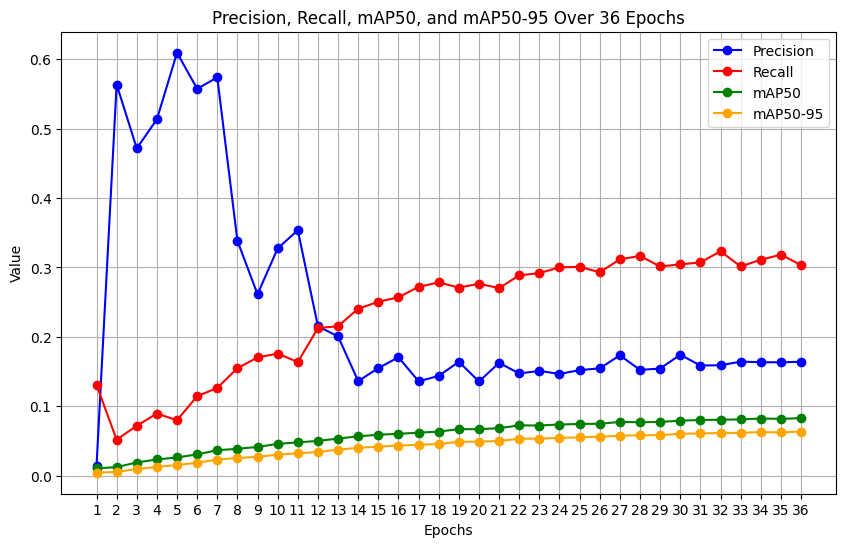

In [ ]:
import matplotlib.pyplot as plt

# Precision, recall, mAP50, and mAP50-95 values for 36 epochs
epochs = list(range(1, 37))
precision_values = [0.01369, 0.56359, 0.47157, 0.51347, 0.60938, 0.55737, 0.57381, 0.33834,
                    0.26141, 0.32746, 0.35368, 0.21523, 0.20062, 0.13625, 0.15495, 0.17062,
                    0.13598, 0.14371, 0.16407, 0.13569, 0.16253, 0.1473, 0.15093, 0.14658,
                    0.15207, 0.15465, 0.17341, 0.15238, 0.15437, 0.17423, 0.15872, 0.15908,
                    0.16433, 0.16348, 0.16333, 0.16413]

recall_values = [0.13092, 0.05182, 0.07191, 0.0895, 0.07992, 0.11454, 0.12636, 0.15486,
                 0.17028, 0.17594, 0.16368, 0.21268, 0.21529, 0.24056, 0.25058, 0.25698,
                 0.27202, 0.27843, 0.27102, 0.27648, 0.27033, 0.28857, 0.29185, 0.30013,
                 0.30082, 0.29309, 0.31167, 0.31664, 0.30138, 0.30445, 0.30726, 0.32328,
                 0.30145, 0.31108, 0.31841, 0.30347]

map50_values = [0.01054, 0.01233, 0.01895, 0.02337, 0.02625, 0.03067, 0.03665, 0.03875,
                0.04139, 0.0458, 0.04797, 0.05011, 0.05339, 0.05672, 0.05895, 0.06033,
                0.06191, 0.06352, 0.06702, 0.06697, 0.06843, 0.07247, 0.07228, 0.0737,
                0.07447, 0.07486, 0.07739, 0.07702, 0.0774, 0.07929, 0.08018, 0.08063,
                0.08106, 0.08232, 0.08189, 0.08288]

map50_95_values = [0.00425, 0.00542, 0.00962, 0.01261, 0.01537, 0.01865, 0.02309, 0.02554,
                   0.02701, 0.03044, 0.03217, 0.0341, 0.03758, 0.0401, 0.04183, 0.04345,
                   0.04448, 0.04568, 0.0488, 0.04906, 0.04986, 0.05339, 0.05337, 0.05447,
                   0.05522, 0.05612, 0.05748, 0.05829, 0.05835, 0.06033, 0.06081, 0.06149,
                   0.06181, 0.06281, 0.0623, 0.06364]

# Plotting precision, recall, mAP50, and mAP50-95
plt.figure(figsize=(10, 6))
plt.plot(epochs, precision_values, label='Precision', marker='o', color='blue')
plt.plot(epochs, recall_values, label='Recall', marker='o', color='red')
plt.plot(epochs, map50_values, label='mAP50', marker='o', color='green')
plt.plot(epochs, map50_95_values, label='mAP50-95', marker='o', color='orange')
plt.title('Precision, Recall, mAP50, and mAP50-95 Over 36 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.xticks(epochs)
plt.grid(True)
plt.legend()
plt.show()

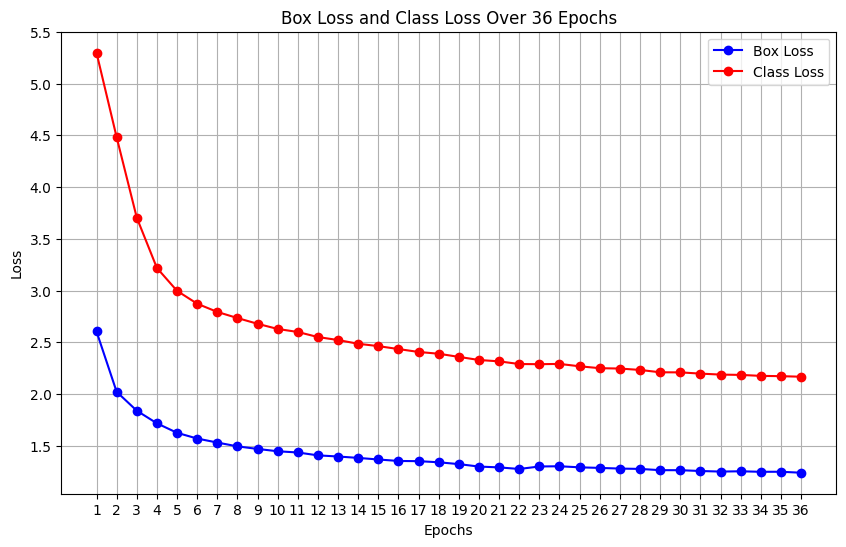

In [ ]:
import matplotlib.pyplot as plt

# Box loss and class loss values for 36 epochs
epochs = list(range(1, 37))
box_loss_values = [2.6048, 2.0218, 1.8393, 1.7172, 1.6257, 1.5701, 1.5314, 1.4946, 1.4698,
                   1.4472, 1.4354, 1.4076, 1.3966, 1.3831, 1.3677, 1.3535, 1.3516, 1.3408,
                   1.323, 1.2994, 1.2914, 1.2761, 1.3002, 1.3024, 1.292, 1.2864, 1.28,
                   1.2767, 1.2645, 1.2643, 1.2565, 1.251, 1.2538, 1.2488, 1.2493, 1.2399]

class_loss_values = [5.2978, 4.4818, 3.7044, 3.2184, 2.9973, 2.8729, 2.7935, 2.7344, 2.6789,
                     2.6289, 2.5997, 2.5507, 2.5219, 2.4858, 2.463, 2.4347, 2.4067, 2.3894,
                     2.3591, 2.3291, 2.3159, 2.2901, 2.2885, 2.2911, 2.2682, 2.2499, 2.2464,
                     2.233, 2.2103, 2.2094, 2.1975, 2.188, 2.185, 2.1756, 2.1728, 2.1674]

# Plotting box loss and class loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, box_loss_values, label='Box Loss', marker='o', color='blue')
plt.plot(epochs, class_loss_values, label='Class Loss', marker='o', color='red')
plt.title('Box Loss and Class Loss Over 36 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.grid(True)
plt.legend()
plt.show()